In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

# Understand the Nature of the data.

## Read data && get quick stats

In [2]:
df = pd.read_csv('./datasets/sales.csv')
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [3]:
df.tail()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610
895,896,1174,1429,1110,54340


In [4]:
df.shape

(896, 5)

In [5]:
df.dtypes

Store ID                int64
Store_Area              int64
Items_Available         int64
Daily_Customer_Count    int64
Store_Sales             int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store ID,896.0,448.500000,258.797218,1.0,224.75,448.5,672.25,896.0
Store_Area,896.0,1485.409598,250.237011,775.0,1316.75,1477.0,1653.50,2229.0
Items_Available,896.0,1782.035714,299.872053,932.0,1575.50,1773.5,1982.75,2667.0
Daily_Customer_Count,896.0,786.350446,265.389281,10.0,600.00,780.0,970.00,1560.0
Store_Sales,896.0,59351.305804,17190.741895,14920.0,46530.00,58605.0,71872.50,116320.0


In [8]:
print("Number of Stores on Dataset:", len(df.Store_Area.unique()))

Number of Stores on Dataset: 583


# Data Analysis

In [9]:
df['Store_Area'].value_counts()

1439    5
1513    5
1458    5
1440    5
1539    5
       ..
1509    1
1339    1
1590    1
2169    1
1387    1
Name: Store_Area, Length: 583, dtype: int64

In [10]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [11]:
df.loc[df['Store_Area'] ==2229, :].sum()['Store_Sales']

87410

In [12]:
df.groupby(['Store_Area']).sum()['Store_Sales']

Store_Area
775     42530
780     25600
854     77740
869     52540
891     67370
        ...  
2063    51480
2067    70230
2169    67080
2214    65900
2229    87410
Name: Store_Sales, Length: 583, dtype: int64

In [13]:
df_sum = df.groupby(['Store_Area'])['Items_Available', 'Daily_Customer_Count', 'Store_Sales']\
                        .agg({'Store_Sales':sum, 'Items_Available':sum, 'Daily_Customer_Count':sum })\
                        .sort_values('Store_Sales', ascending=False).reset_index()

In [14]:
df_sum.head()

,Store_Area,Store_Sales,Items_Available,Daily_Customer_Count
0,1440,362330,8659,4300
1,1539,345940,9205,4060
2,1439,341400,8640,4460
3,1513,311570,9073,3590
4,1458,300200,8710,3880


In [15]:
df_sum.describe().T

,count,mean,std,min,25%,50%,75%,max
Store_Area,583.0,1499.696398,273.357398,775.0,1306.0,1495.0,1708.0,2229.0
Store_Sales,583.0,91215.728988,52375.544509,21650.0,56000.0,74520.0,117875.0,362330.0
Items_Available,583.0,2738.771870,1464.221471,932.0,1726.0,2174.0,3551.0,9205.0
Daily_Customer_Count,583.0,1208.524871,719.218184,70.0,710.0,980.0,1565.0,4460.0


In [16]:
df_sum.loc[df_sum['Store_Area'] == 1659, :]

,Store_Area,Store_Sales,Items_Available,Daily_Customer_Count
51,1659,167270,5968,1800


In [17]:
df.loc[df['Store_Area'] == 1659, :]

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
313,314,1659,2008,620,35120
733,734,1659,1999,650,65660


In [18]:
# Visitors
top_10_stores_less_visitors = df_sum.sort_values('Daily_Customer_Count')[:10]
top_10_stores_by_visitors = df_sum.sort_values('Daily_Customer_Count', ascending=False)[:10]

# Stores
top_10_stores_less_sales = df_sum.sort_values('Store_Sales')[:10]
top_10_stores_by_sales = df_sum.sort_values('Store_Sales', ascending=False)[:10]

# Inventory (Items available)
top_10_stores_less_inventory = df_sum.sort_values('Items_Available')[:10]
top_10_stores_by_inventory = df_sum.sort_values('Items_Available', ascending=False)[:10]

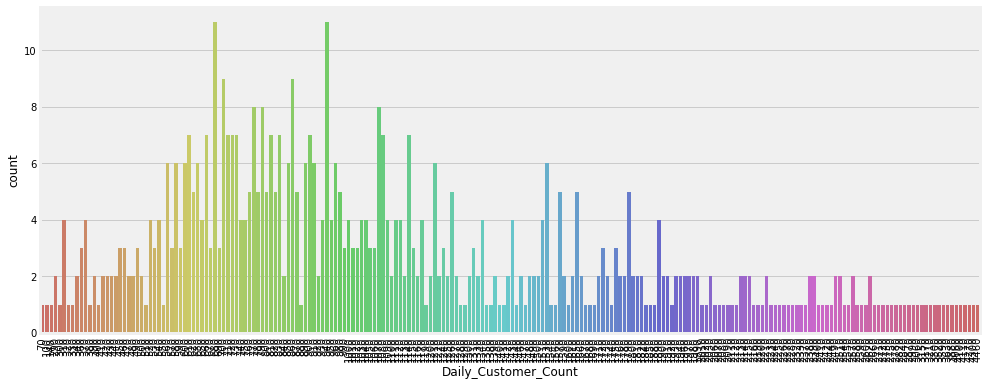

In [19]:
plt.figure(figsize=(15,6))
sns.countplot('Daily_Customer_Count', data=df_sum,
             palette='hls')
plt.xticks(rotation=90)
plt.show()

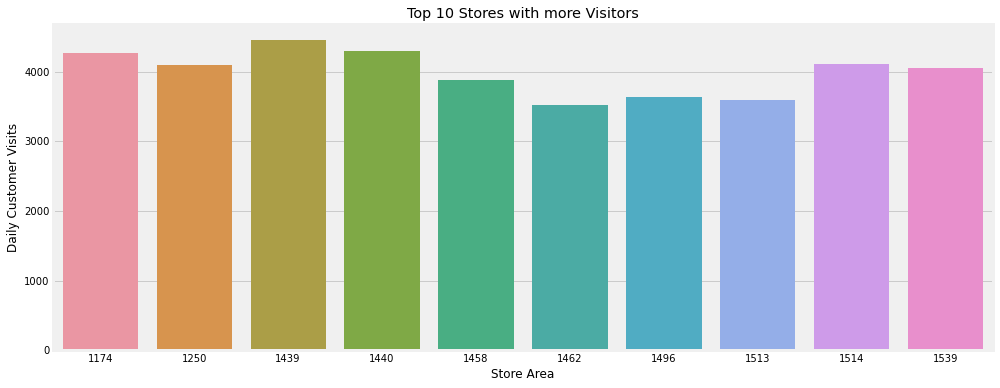

In [20]:
plt.figure(figsize=(15,6))
plt.title('Top 10 Stores with more Visitors')
sns.barplot(x='Store_Area', y='Daily_Customer_Count', data=top_10_stores_by_visitors)
plt.xlabel("Store Area")
plt.ylabel("Daily Customer Visits")
plt.show()

In [21]:
top_10_stores_by_visitors[['Store_Area', 'Daily_Customer_Count']]

,Store_Area,Daily_Customer_Count
2,1439,4460
0,1440,4300
40,1174,4270
17,1514,4110
33,1250,4100
1,1539,4060
4,1458,3880
5,1496,3630
3,1513,3590
7,1462,3520


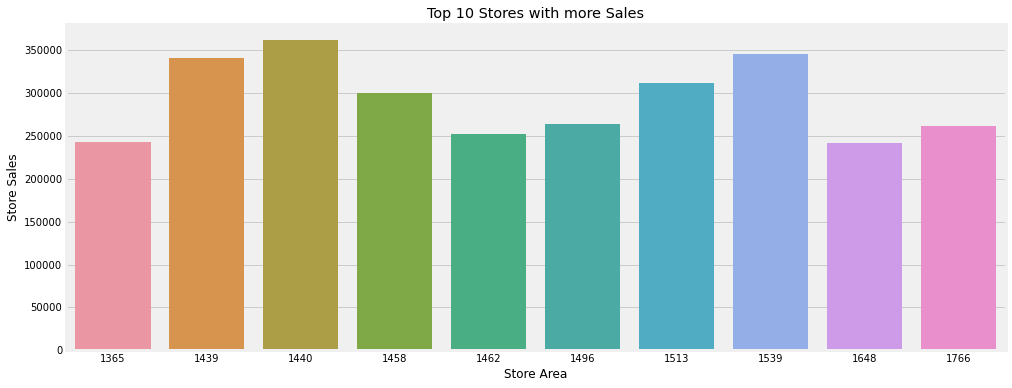

In [22]:
plt.figure(figsize=(15,6))
sns.barplot(x='Store_Area', y='Store_Sales', data=top_10_stores_by_sales)
plt.xlabel("Store Area")
plt.ylabel("Store Sales")
plt.title('Top 10 Stores with more Sales')
plt.show()

In [23]:
top_10_stores_by_sales[['Store_Area', 'Store_Sales']]

,Store_Area,Store_Sales
0,1440,362330
1,1539,345940
2,1439,341400
3,1513,311570
4,1458,300200
5,1496,263890
6,1766,261250
7,1462,252820
8,1365,243340
9,1648,241730


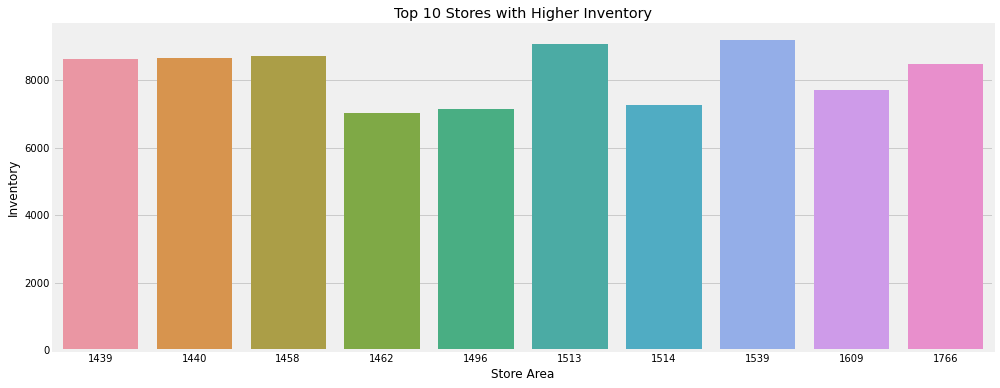

In [24]:
plt.figure(figsize=(15,6))
sns.barplot(x='Store_Area', y='Items_Available', data=top_10_stores_by_inventory)
plt.xlabel("Store Area")
plt.ylabel("Inventory")
plt.title('Top 10 Stores with Higher Inventory')
plt.show()

In [25]:
top_10_stores_by_inventory[['Store_Area', 'Items_Available']]

,Store_Area,Items_Available
1,1539,9205
3,1513,9073
4,1458,8710
0,1440,8659
2,1439,8640
6,1766,8489
19,1609,7725
17,1514,7273
5,1496,7152
7,1462,7025


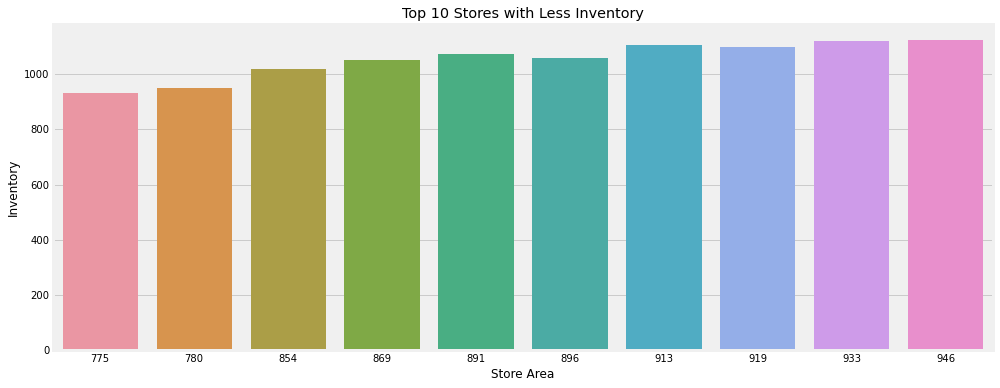

In [26]:
plt.figure(figsize=(15,6))
sns.barplot(x='Store_Area', y='Items_Available', data=top_10_stores_less_inventory)
plt.xlabel("Store Area")
plt.ylabel("Inventory")
plt.title('Top 10 Stores with Less Inventory')
plt.show()

In [27]:
top_10_stores_less_inventory[['Store_Area', 'Items_Available']]

,Store_Area,Items_Available
528,775,932
578,780,951
273,854,1018
456,869,1050
289,896,1059
342,891,1073
296,919,1099
429,913,1106
437,933,1121
573,946,1125
